# Dark matter substructure model:

In [1]:
from subhalos_latest2 import *

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Define the main variables of the new model (The subhalos spatial distribution is defines as the one of a host halo of mass M0 at redshift 0): 

In [2]:
M0=1e12                         #Mass of the host halo.
N_ma=300                        #number of subhalo mass values in a given range.
zmax=7                          #highest redshift value for mass accretion.
N_r=100                         #The number of distance/Rvir values in the given range [0.01,1]

logmamin=-6                      #The minimum subhalos' masss in units of ln(mass).
mmodel_1=2                      #This variable defines the dm/dt model for the calculation,see subhalos_latest2.py
                                #at function msolve for more details. 
    
mmodel_2=3                      #This dm/dt model correspond to the model with no spatial information.
mmodel_3=1
rmin=0.0001                   #Minimum distance/Rvir of subhalos' positions from host's center.
logr=True                       #Argument for logspace values of distance/Rvir.
redshift=0
dz=0.3

The new model for the above parameters can be calculated:

In [3]:
#Calculating the substructure with the new model with use of spatial information for dm/dt of toy model:

ma200_new, rs_a_new, rhos_a_new, m0_new, rs0_new, rhos0_new, ct0_new, weight_new, survive_new,r_new,zacc_new  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_1,
                       rmin=rmin,logr=logr,dz=dz)

ma200_new  *= Msolar
m0_new     *= Msolar
rs_a_new   *= kpc
rs0_new    *= kpc
rhos_a_new *= Msolar/pc**3
rhos0_new  *= Msolar/pc**3

rpeak_new = 2.163*rs_a_new
rmax_new  = 2.163*rs0_new
Vpeak_new = np.sqrt(4.*np.pi*G*rhos_a_new/4.625)*rs_a_new
Vmax_new  = np.sqrt(4.*np.pi*G*rhos0_new/4.625)*rs0_new

/home/tsexos/jupyter/environment/Lefteris_subhalos/Final_Comparison/MC_catalogs/subhalos_latest2.py:179: RuntimeWarning: invalid value encountered in power
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/Final_Comparison/MC_catalogs/subhalos_latest2.py:179: RuntimeWarning: overflow encountered in exp
  return pow(2*np.pi,-0.5)*(delc2-delc1)*pow(sig2-sig1,-1.5)*np.exp(-pow(delc2-delc1,2)*pow(2*(sig2-sig1),-1))
/home/tsexos/jupyter/environment/Lefteris_subhalos/Final_Comparison/MC_catalogs/subhalos_latest2.py:215: RuntimeWarning: invalid value encountered in true_divide
  Phi = Ffunc_Yang(delcM,delca,sM,sa)/normB*np.heaviside(mmax-ma,0)


In [4]:
#Calculating the substructure with the new model with use of spatial information for dm/dt of model 4:

ma200_new2,rs_a_new2,rhos_a_new2,m0_new2,rs0_new2,rhos0_new2,ct0_new2,weight_new2,survive_new2,r_new2,zacc_new2  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_2,
                       rmin=rmin,logr=logr,dz=dz)

ma200_new2  *= Msolar
m0_new2     *= Msolar
rs_a_new2   *= kpc
rs0_new2    *= kpc
rhos_a_new2 *= Msolar/pc**3
rhos0_new2  *= Msolar/pc**3

rpeak_new2 = 2.163*rs_a_new2
rmax_new2  = 2.163*rs0_new2
Vpeak_new2 = np.sqrt(4.*np.pi*G*rhos_a_new2/4.625)*rs_a_new2
Vmax_new2  = np.sqrt(4.*np.pi*G*rhos0_new2/4.625)*rs0_new2

In [5]:
#Calculating the substructure with the initial model with no use of spatial information:

ma200_av, rs_a_av, rhos_a_av, m0_av, rs0_av, rhos0_av, ct0_av, weight_av, survive_av,r_av,zacc_av  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=1,mmodel=mmodel_3,dz=dz)

ma200_av  *= Msolar
m0_av     *= Msolar
rs_a_av   *= kpc
rs0_av    *= kpc
rhos_a_av *= Msolar/pc**3
rhos0_av  *= Msolar/pc**3

rpeak_av = 2.163*rs_a_av
rmax_av  = 2.163*rs0_av
Vpeak_av = np.sqrt(4.*np.pi*G*rhos_a_av/4.625)*rs_a_av
Vmax_av  = np.sqrt(4.*np.pi*G*rhos0_av/4.625)*rs0_av

In [6]:
def subhalo_catalog_MC(m0_g,rs0_g,rhos0_g,ct0_g,weight_g,mth,r_g=None):
    
    condition = (m0_g>mth)
    m0        = m0_g[condition]
    rs0       = rs0_g[condition]
    rhos0     = rhos0_g[condition]
    ct0       = ct0_g[condition]
    weight    = weight_g[condition]
        
    mu_sh      = np.sum(weight)
    prob       = weight/mu_sh
    subhalo_id = np.arange(np.alen(prob))
    N_sh       = np.random.poisson(mu_sh)
    id_MC      = np.random.choice(subhalo_id,size=N_sh,p=prob)

    m0_MC      = m0[id_MC]
    rs0_MC     = rs0[id_MC]
    rhos0_MC   = rhos0[id_MC]
    ct0_MC     = ct0[id_MC]

    if r_g is None:
        return m0_MC/Msolar, rs0_MC/kpc, rhos0_MC/(Msolar/pc**3), ct0_MC 
    else:
        r = r_g[condition]
        r_MC = r[id_MC]
        return m0_MC/Msolar, rs0_MC/kpc, rhos0_MC/(Msolar/pc**3), ct0_MC , r_MC

In [35]:
m_min = 1e7
m0_2, rs0_2, rhos0_2, ct0_2 , r_2 = subhalo_catalog_MC(m0_new,rs0_new,rhos0_new,
                                                                 ct0_new,weight_new,m_min*Msolar,r_g=r_new)

m0_ns, rs0_ns, rhos0_ns, ct0_ns = subhalo_catalog_MC(m0_av,
                                                            rs0_av,rhos0_av,ct0_av,weight_av,m_min*Msolar)

m0_3, rs0_3, rhos0_3, ct0_3 , r_3 = subhalo_catalog_MC(m0_new2,rs0_new2,rhos0_new2,
                                                       ct0_new2,weight_new2,m_min*Msolar,r_g=r_new2)

In [36]:
print("Number of subhalos with mass higher than ",m_min,
      " solar mass for a dark matter host with mass ",M0," solar mass:")

print(" Model 2 case:",len(m0_2),"\n Model 3 case:",len(m0_3),"\n No spatial information case:",len(m0_ns))

Number of subhalos with mass higher than  10000000.0  solar mass for a dark matter host with mass  1000000000000.0  solar mass:
 Model 2 case: 298 
 Model 3 case: 241 
 No spatial information case: 264


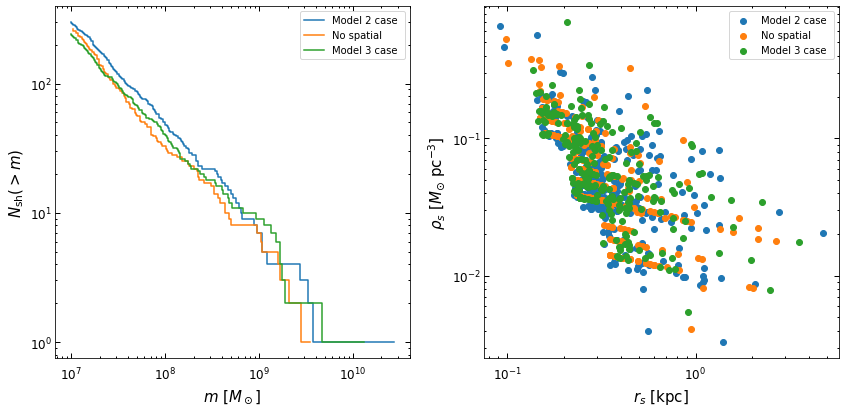

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.step(np.sort(m0_2),np.arange(1,np.alen(m0_2)+1)[::-1])
ax1.step(np.sort(m0_ns),np.arange(1,np.alen(m0_ns)+1)[::-1])
ax1.step(np.sort(m0_3),np.arange(1,np.alen(m0_3)+1)[::-1])

ax2.scatter(rs0_2,rhos0_2)
ax2.scatter(rs0_ns,rhos0_ns)
ax2.scatter(rs0_3,rhos0_3)

for ax in (ax1,ax2):
        ax.tick_params(labelsize=12)
        ax.legend(['Model 2 case ','No spatial','Model 3 case '],fontsize=10)
        ax.set_xscale('log')
        ax.set_yscale('log')
        
ax1.set_xlabel(r'$m$ [$M_\odot$]')
ax1.set_ylabel(r'$N_{\rm sh}(>m)$')   

ax2.set_xlabel(r'$r_s$ [kpc]')
ax2.set_ylabel(r'$\rho_s$ [$M_{\odot} \ \mathrm{pc^{-3}}$]')
plt.tight_layout()
plt.show()

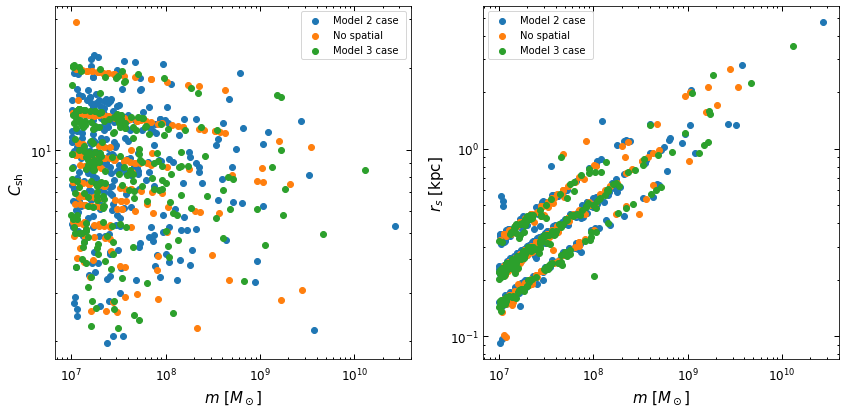

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.scatter(m0_2,ct0_2)
ax1.scatter(m0_ns,ct0_ns)
ax1.scatter(m0_3,ct0_3)

ax2.scatter(m0_2,rs0_2)
ax2.scatter(m0_ns,rs0_ns)
ax2.scatter(m0_3,rs0_3)

for ax in (ax1,ax2):
        ax.tick_params(labelsize=12)
        ax.legend(['Model 2 case ','No spatial','Model 3 case '],fontsize=10)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel(r'$m$ [$M_\odot$]')
        
ax1.set_ylabel(r'$C_{\rm sh}$')   
ax2.set_ylabel(r'$r_s$ [kpc]')
plt.tight_layout()
plt.show()

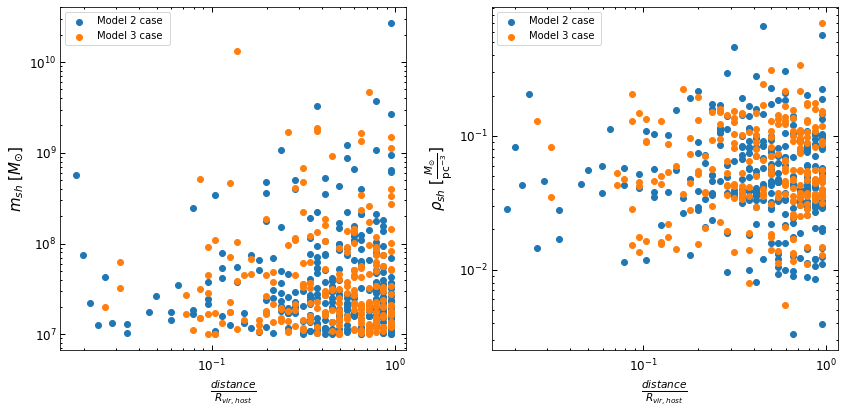

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.scatter(r_2,m0_2)
ax1.scatter(r_3,m0_3)
ax2.scatter(r_2,rhos0_2)
ax2.scatter(r_3,rhos0_3)
for ax in (ax1,ax2):
        ax.tick_params(labelsize=12)
        ax.legend(['Model 2 case ','Model 3 case '],fontsize=10)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')

ax2.set_ylabel(r'$\rho_{sh}$ $[\frac{M_{\odot}}{\mathrm{pc^{-3}}}] $')
ax1.set_ylabel(r'$m_{sh}$ [$M_{\odot}$]')
plt.tight_layout()
plt.show()

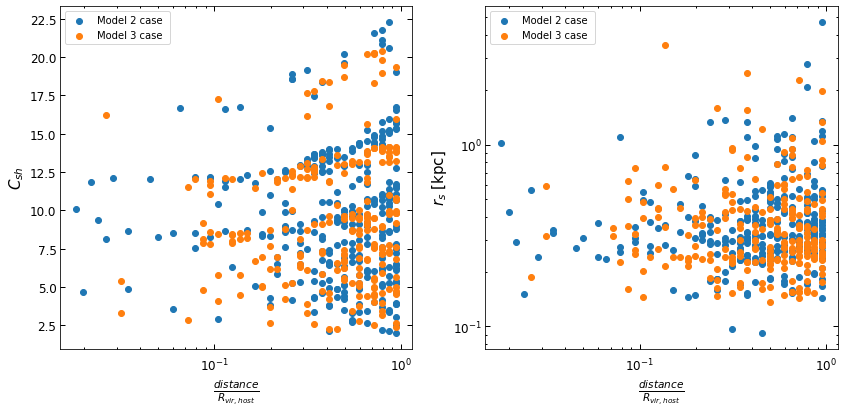

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.scatter(r_2,ct0_2)
ax1.scatter(r_3,ct0_3)
ax2.scatter(r_2,rs0_2)
ax2.scatter(r_3,rs0_3)
for ax in (ax1,ax2):
        ax.tick_params(labelsize=12)
        ax.legend(['Model 2 case ','Model 3 case '],fontsize=10)
        ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
        ax.set_xscale('log')
        
ax1.set_ylabel(r'$C_{sh}$')
ax2.set_ylabel(r'$r_s$ [kpc]')
ax2.set_yscale('log')
plt.tight_layout()
plt.show()

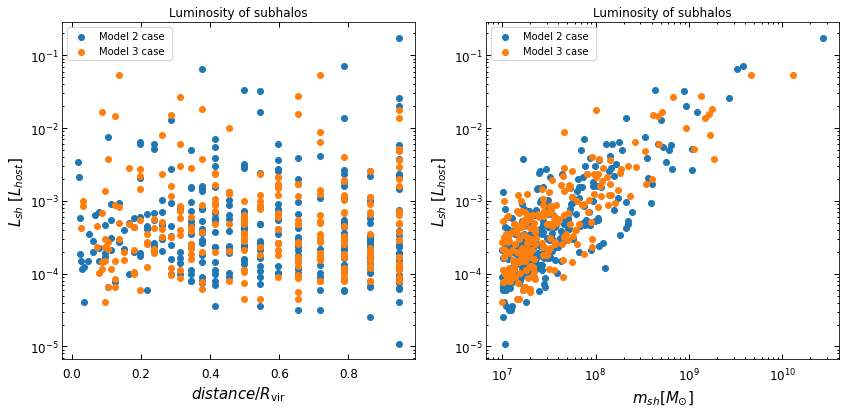

In [41]:
Mhost=Msolar*1e12
r200_host = (3.*Mhost/(4.*np.pi*rhocrit(redshift)*200.))**(1./3.)
c200_host = conc200(Mhost,redshift)
rs_host   = r200_host/c200_host
rhos_host = Mhost/(4.*np.pi*rs_host**3*fc(c200_host))
Lhost0    = rhos_host**2*rs_host**3*(1.-1./(1.+c200_host)**3)

Lsh_2 = (rhos0_2*Msolar/pc**3)**2*(rs0_2*kpc)**3*(1.-1./(1.+ct0_2)**3)
Bsh_2 = Lsh_2/Lhost0

Lsh_3 = (rhos0_3*Msolar/pc**3)**2*(rs0_3*kpc)**3*(1.-1./(1.+ct0_3)**3)
Bsh_3 = Lsh_3/Lhost0
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.scatter(r_2,Bsh_2)
ax1.scatter(r_3,Bsh_3)
ax2.scatter(m0_2,Bsh_2)
ax2.scatter(m0_3,Bsh_3)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.legend(['Model 2 case ','Model 3 case '],fontsize=10)
    ax.set_title("Luminosity of subhalos",fontsize=12)
    ax.set_ylabel(r'$L_{sh}$ $[L_{host}]$')
    ax.set_yscale('log')

ax1.set_xlabel(r'$distance /R_{\rm vir}$')
ax2.set_xlabel(r'$m_{sh} [M_{\odot}]$')
ax2.set_xscale('log')
plt.tight_layout()
plt.show()

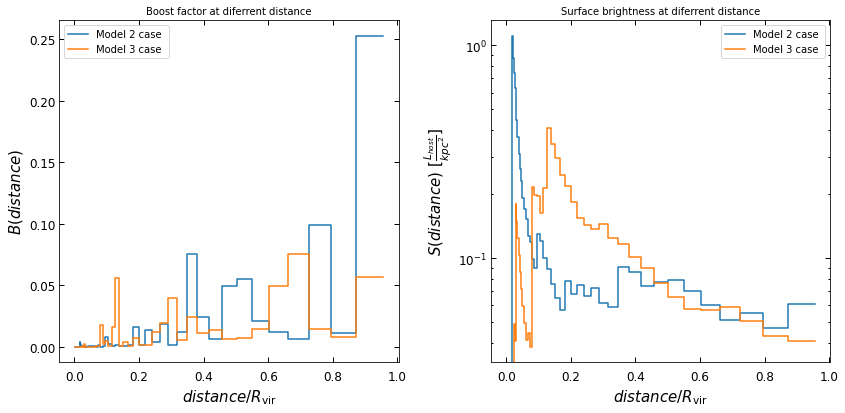

In [ ]:
if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+1)
else:
    bins=np.linspace(rmin,1,N_r+1)

Boost_2,distance_edge =np.histogram(r_2,weights=Bsh_2,bins=bins)
Boost_3,distance_edge =np.histogram(r_3,weights=Bsh_3,bins=bins)

distance = (distance_edge[1:]+distance_edge[:-1])/2.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.step(distance,Boost_2)
ax2.step(distance,np.cumsum(Boost_2)/(4*np.pi*distance**2))
ax1.step(distance,Boost_3)
ax2.step(distance,np.cumsum(Boost_3)/(4*np.pi*distance**2))
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.legend(['Model 2 case ','Model 3 case '],fontsize=10)
    ax.set_xlabel(r'$distance /R_{\rm vir}$')

ax1.set_title("Boost factor at diferrent distance",fontsize=10)
ax2.set_title("Surface brightness at diferrent distance",fontsize=10)
ax1.set_ylabel(r'$B(distance)$')
ax2.set_ylabel(r'$S(distance)$ $[\frac{L_{host}}{kpc^{2}}]$')
ax2.set_yscale('log')
plt.tight_layout()
plt.show()

## Monte Carlo Catalogue Of 2d Projection of Host's Substructure: 

In [43]:
phi=np.random.uniform(0,2*np.pi,len(r_3))
theta=np.random.uniform(0,2*np.pi,len(r_3))
center_x_3 = np.sin(theta)*np.cos(phi)*r_3
center_y_3 = np.sin(theta)*np.sin(phi)*r_3


phi=np.random.uniform(0,2*np.pi,len(r_2))
theta=np.random.uniform(0,2*np.pi,len(r_2))
center_x_2 = np.sin(theta)*np.cos(phi)*r_2
center_y_2 = np.sin(theta)*np.sin(phi)*r_2

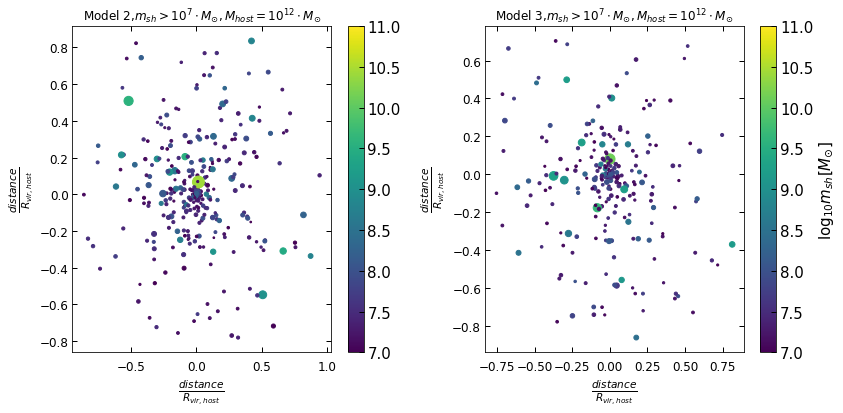

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
    ax.set_ylabel(r'$\frac{distance}{R_{vir,host}}$')
    
c1 = ax1.scatter(center_x_2,center_y_2,c=np.log10(m0_2),vmin=7, vmax=11,s=30*rs0_2)
c2 = ax2.scatter(center_x_3,center_y_3,c=np.log10(m0_3),vmin=7, vmax=11,s=30*rs0_3)
ax1.set_title('Model 2,$m_{sh}>10^{7} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 3,$m_{sh}>10^{7} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
fig.colorbar(c1,ax=ax1)
cbar = fig.colorbar(c2,ax=ax2)
cbar.set_label(r'$\log_{10}m_{sh} [M_{\odot}]$')

plt.tight_layout()
#plt.savefig('subh_comp_mc_mass_7_distane_2_3.png')
plt.show()

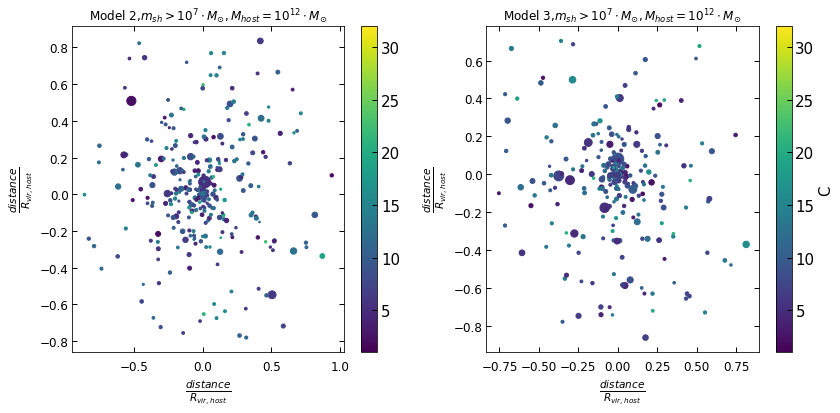

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
    ax.set_ylabel(r'$\frac{distance}{R_{vir,host}}$')
    
c1 = ax1.scatter(center_x_2,center_y_2,c=ct0_2,vmin=1, vmax=32,s=30*rs0_2)
c2 = ax2.scatter(center_x_3,center_y_3,c=ct0_3,vmin=1, vmax=32,s=40*rs0_3)
ax1.set_title('Model 2,$m_{sh}>10^{7} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 3,$m_{sh}>10^{7} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
fig.colorbar(c1,ax=ax1)
cbar = fig.colorbar(c2,ax=ax2)
cbar.set_label('C')

plt.tight_layout()
#plt.savefig('subh_comp_mc_mass_7_distane_c_2_3.png')
plt.show()

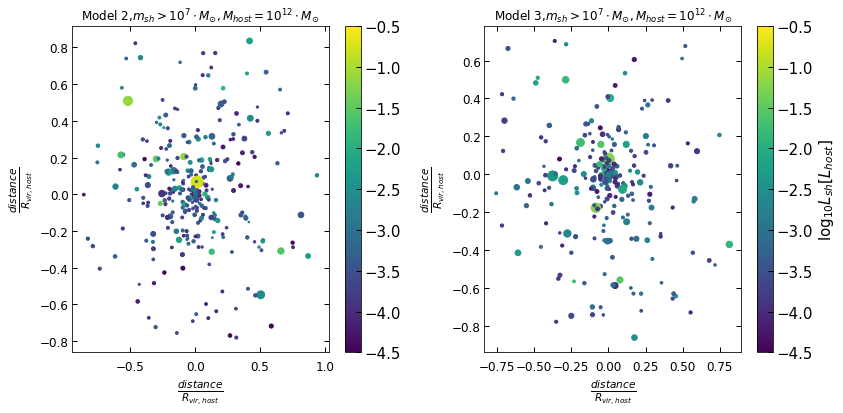

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir,host}}$')
    ax.set_ylabel(r'$\frac{distance}{R_{vir,host}}$')
    
c1 = ax1.scatter(center_x_2,center_y_2,c=np.log10(Bsh_2),vmin=-4.5, vmax=-0.5,s=30*rs0_2)
c2 = ax2.scatter(center_x_3,center_y_3,c=np.log10(Bsh_3),vmin=-4.5, vmax=-0.5,s=40*rs0_3)
ax1.set_title('Model 2,$m_{sh}>10^{7} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
ax2.set_title('Model 3,$m_{sh}>10^{7} \cdot M_{\odot},M_{host}=10^{12} \cdot M_{\odot}$',fontsize=12)
fig.colorbar(c1,ax=ax1)
cbar = fig.colorbar(c2,ax=ax2)
cbar.set_label(r'$\log_{10}L_{sh} [L_{host}]$')
plt.tight_layout()
#plt.savefig('subh_comp_mc_mass_7_distane_L_2_3.png')
plt.show()